In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [23]:
personality_questions = pd.read_csv('cleaned_youngpeople_data.csv')
personality_questions.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


In [24]:
personality_questions

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,5,2,5,2,2,5,4,4,4,3,...,20,164,57,1,female,right handed,secondary school,no,city,house/bungalow
973,4,4,5,1,3,4,1,4,1,1,...,27,183,80,5,male,left handed,masters degree,no,village,house/bungalow
974,4,3,1,1,2,2,2,3,4,1,...,18,173,75,0,female,right handed,secondary school,yes,city,block of flats
975,5,3,3,3,1,3,1,3,4,1,...,25,173,58,1,female,right handed,college/bachelor degree,no,city,block of flats


In [25]:
personality_questions[['Music','Dance','Folk', 'Country', 'Classical music', 'Musical', 'Pop', 
                                                            'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 
                                                            'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 
                                                            'Alternative', 'Latino', 'Techno, Trance', 'Opera']].describe()

,Music,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,4.736950,3.103378,2.279427,2.122825,2.960082,2.774821,3.487206,3.766633,2.362334,2.446264,2.901740,2.762538,2.768680,3.147390,2.832139,2.844422,2.324463,2.143296
std,0.653957,1.164959,1.131116,1.075653,1.246899,1.257136,1.153261,1.174696,1.371450,1.291297,1.372508,1.208283,1.253569,1.232574,1.337691,1.324560,1.313605,1.182150
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,5.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
personality_questions['Country'] = round((personality_questions['Country'] + personality_questions['Folk']) / 2)

In [27]:
personality_questions['Rock'] = round((personality_questions['Rock'] + personality_questions['Rock n roll']) / 2)

In [28]:
personality_questions['Alternative'] = round((personality_questions['Alternative'] + personality_questions['Punk'] + personality_questions['Metal or Hardrock']) / 3)

In [29]:
personality_questions['Classical music'] = round((personality_questions['Classical music'] + personality_questions['Opera'] + personality_questions['Swing, Jazz']) / 3)

In [30]:
personality_questions['Dance'] = round((personality_questions['Dance'] + personality_questions['Techno, Trance']) / 2)

In [32]:
personality_questions['Top Genre'] = personality_questions[['Dance', 'Country', 'Classical music', 'Pop', 
                                                            'Rock', 'Hiphop, Rap', 'Alternative', 'Latino']].idxmax(axis=1)

In [33]:
personality_questions.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Top Genre
0,5,3,2.0,1,2.0,1.0,1,5,4.0,1,...,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats,Pop
1,4,4,2.0,1,1.0,1.0,2,3,4.0,4,...,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats,Rock
2,5,5,2.0,2,2.0,3.0,5,3,5.0,3,...,176,67,2,female,right handed,secondary school,no,city,block of flats,Rock
3,5,3,2.0,1,1.0,1.0,1,2,2.0,1,...,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow,Alternative
4,5,3,3.0,3,2.0,3.0,3,5,2.0,1,...,170,59,1,female,right handed,secondary school,no,village,house/bungalow,Pop


## Using Personality Questions

In [27]:
personality_to_music_questions = personality_questions.drop(['Slow songs or fast songs'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(personality_to_music_questions.drop(['Slow songs or fast songs'], axis='columns'),
                                                    personality_to_music_questions['Slow songs or fast songs'], 
                                                    test_size=0.2)

In [29]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [30]:
model.fit(X_train, y_train)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [31]:
model.score(X_test, y_test)

0.5204081632653061

In [32]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  0,  0,  0,  1],
       [ 0,  1, 12,  2,  2],
       [ 0,  1, 98,  8,  6],
       [ 0,  1, 36,  3,  3],
       [ 0,  0, 16,  6,  0]])

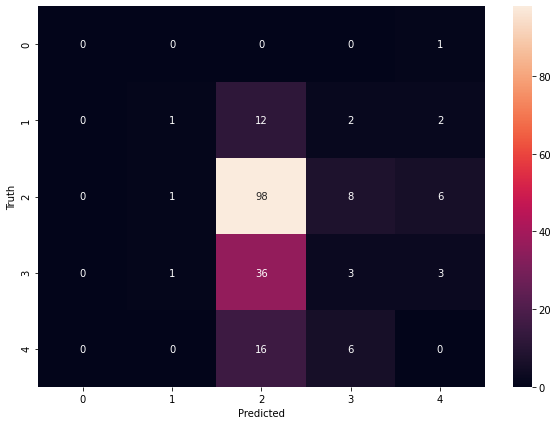

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Using Demographic Questions

In [62]:
personality_questions.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [63]:
demographic_to_music_questions = personality_questions[['Slow songs or fast songs', 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town','House - block of flats']]

In [64]:
demographic_to_music_questions.head()

,Slow songs or fast songs,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,3,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,3,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,3,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


In [65]:
demographic_to_music_questions = pd.get_dummies(demographic_to_music_questions, columns=["Left - right handed", "Education"], prefix=["hand", "education"])

In [68]:
demographic_to_music_questions["Gender"] = demographic_to_music_questions["Gender"].astype('category')
demographic_to_music_questions["Only child"] = demographic_to_music_questions["Only child"].astype('category')
demographic_to_music_questions["Village - town"] = demographic_to_music_questions["Village - town"].astype('category')
demographic_to_music_questions["House - block of flats"] = demographic_to_music_questions["House - block of flats"].astype('category')

demographic_to_music_questions["Gender"] = demographic_to_music_questions["Gender"].cat.codes
demographic_to_music_questions["Only child"] = demographic_to_music_questions["Only child"].cat.codes
demographic_to_music_questions["Village - town"] = demographic_to_music_questions["Village - town"].cat.codes
demographic_to_music_questions["House - block of flats"] = demographic_to_music_questions["House - block of flats"].cat.codes
demographic_to_music_questions.head()

,Slow songs or fast songs,Age,Height,Weight,Number of siblings,Gender,Only child,Village - town,House - block of flats,hand_left handed,hand_right handed,education_college/bachelor degree,education_currently a primary school pupil,education_doctorate degree,education_masters degree,education_primary school,education_secondary school
0,3,20,163,48,1,0,0,1,0,0,1,1,0,0,0,0,0
1,4,19,163,58,2,0,0,0,0,0,1,1,0,0,0,0,0
2,5,20,176,67,2,0,0,0,0,0,1,0,0,0,0,0,1
3,3,22,172,59,1,0,1,0,1,0,1,1,0,0,0,0,0
4,3,20,170,59,1,0,0,1,1,0,1,0,0,0,0,0,1


In [69]:
X_train, X_test, y_train, y_test = train_test_split(demographic_to_music_questions.drop(['Slow songs or fast songs'], axis='columns'),
                                                    demographic_to_music_questions['Slow songs or fast songs'], 
                                                    test_size=0.2)

In [70]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [71]:
model.fit(X_train, y_train)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [72]:
model.score(X_test, y_test)

0.6020408163265306

In [73]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   0,   4,   0,   0],
       [  0,   0,  14,   0,   0],
       [  0,   0, 116,   2,   0],
       [  0,   0,  40,   2,   0],
       [  0,   0,  18,   0,   0]])

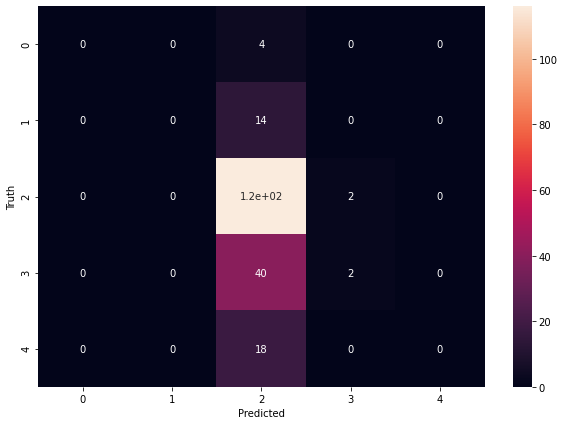

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()